# **Business Understanding**

Pistachios are a popular nut consumed worldwide, both as a snack and as an ingredient in various dishes. The quality, taste, and commercial value of pistachios can differ based on their variety.

Given the importance of distinguishing between different varieties of pistachios, our primary objective is to develop a model that can accurately classify pistachios into their respective types (Kirmizi Pistachio and Siirt Pistachio) based solely on their images.

# **Data Understanding**

In [44]:
!pip install torchvision

In [45]:
# Set the path to the dataset
!git clone https://github.com/neeharikasinghsjsu/cmpe255assignments.git

dataset_path = 'cmpe255assignments/DataPreparationAssignment/datasets/Pistachio_image_dataset'

fatal: destination path 'cmpe255assignments' already exists and is not an empty directory.


In [46]:
import os

pistachio_dataset_contents = os.listdir(dataset_path)
pistachio_dataset_contents

['val', 'Kirmizi_Pistachio', 'test', 'train', 'Siirt_Pistachio']

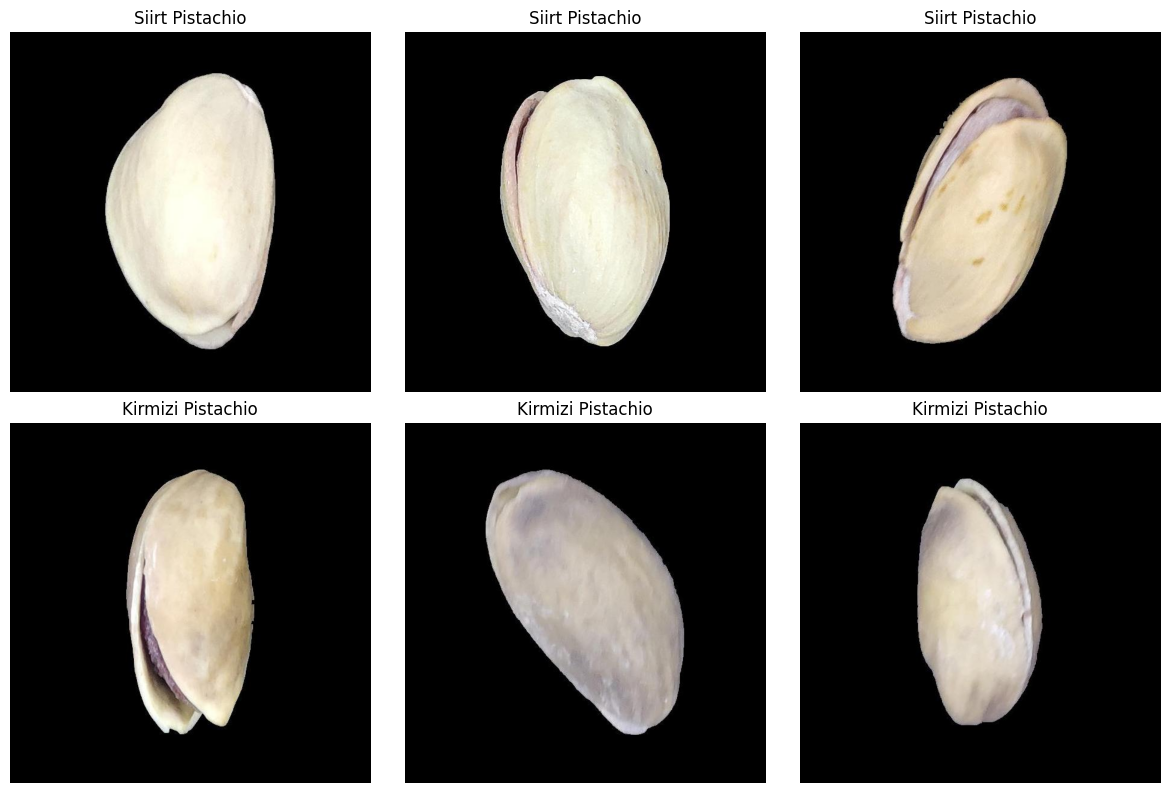

(917, 1232)

In [47]:
from PIL import Image
import matplotlib.pyplot as plt

# Paths to the two categories
siirt_path = "cmpe255assignments/DataPreparationAssignment/datasets/Pistachio_image_dataset/Siirt_Pistachio"
kirmizi_path = "cmpe255assignments/DataPreparationAssignment/datasets/Pistachio_image_dataset/Kirmizi_Pistachio"

# Count the number of images in each category
num_siirt_images = len(os.listdir(siirt_path))
num_kirmizi_images = len(os.listdir(kirmizi_path))

# Load a few sample images from each category for visualization
sample_siirt_images = [Image.open(os.path.join(siirt_path, img_name)) for img_name in os.listdir(siirt_path)[:3]]
sample_kirmizi_images = [Image.open(os.path.join(kirmizi_path, img_name)) for img_name in os.listdir(kirmizi_path)[:3]]

# Display the sample images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for ax, img in zip(axes[0], sample_siirt_images):
    ax.imshow(img)
    ax.set_title("Siirt Pistachio")
    ax.axis('off')

for ax, img in zip(axes[1], sample_kirmizi_images):
    ax.imshow(img)
    ax.set_title("Kirmizi Pistachio")
    ax.axis('off')

plt.tight_layout()
plt.show()

num_siirt_images, num_kirmizi_images


**Sample Visualization:**

The top row displays sample images of "Siirt Pistachio".
The bottom row displays sample images of "Kirmizi Pistachio".

**Data Distribution:**

There are 916 images of "Siirt Pistachio".
There are 1232 images of "Kirmizi Pistachio".

The data distribution is slightly imbalanced, with more images for "Kirmizi Pistachio" than for "Siirt Pistachio".

# **Data Preparation**

**Data Quality Checks**

In [48]:
# Check for corrupted or unreadable images
corrupted_images = []

# Check images in Siirt Pistachio folder
for img_name in os.listdir(siirt_path):
    img_path = os.path.join(siirt_path, img_name)
    try:
        img = Image.open(img_path)
        img.verify()  # This checks if the image can be opened and read
    except:
        corrupted_images.append(img_path)

# Check images in Kirmizi Pistachio folder
for img_name in os.listdir(kirmizi_path):
    img_path = os.path.join(kirmizi_path, img_name)
    try:
        img = Image.open(img_path)
        img.verify()  # This checks if the image can be opened and read
    except:
        corrupted_images.append(img_path)

corrupted_images


['cmpe255assignments/DataPreparationAssignment/datasets/Pistachio_image_dataset/Siirt_Pistachio/augmented']

There are no corrupted or unreadable images in the dataset.

**Data Augmentation**

Data augmentation artificially increases the size of the training set by creating modified versions of images in the dataset. This can help improve model generalization, especially when the dataset is relatively small. Common augmentation techniques include rotation, zooming, flipping, and cropping.

In [49]:
# Data Augmentation for Siirt Pistachio

# Number of augmented images needed to balance the classes
num_augmented_images_needed = num_kirmizi_images - num_siirt_images

# Reset augmented directory
if os.path.exists(augmented_siirt_path):
    shutil.rmtree(augmented_siirt_path)
os.makedirs(augmented_siirt_path)

augmented_count = 0

# Apply augmentations to Siirt Pistachio images until classes are balanced
for img_path in random.choices(siirt_images, k=num_augmented_images_needed):
    img = Image.open(img_path)
    augmented_img = augmentation_transforms(img)

    # Save the augmented image
    augmented_img_name = f"augmented_{augmented_count}.jpg"
    augmented_img_path = os.path.join(augmented_siirt_path, augmented_img_name)
    augmented_img.save(augmented_img_path)

    augmented_count += 1

# Update the number of Siirt Pistachio images after augmentation
num_siirt_images_updated = len(os.listdir(siirt_path)) + len(os.listdir(augmented_siirt_path))
num_siirt_images_updated


1232

The data augmentation process is now complete. After augmentation:

"Siirt Pistachio" category has 1233 images (including the augmented ones).

"Kirmizi Pistachio" category has 1232 images.


In [50]:
# Data Splitting

# Clear previous splits if they exist
for directory in [train_dir, val_dir, test_dir]:
    for category in ["Siirt_Pistachio", "Kirmizi_Pistachio"]:
        shutil.rmtree(os.path.join(directory, category), ignore_errors=True)
        os.makedirs(os.path.join(directory, category), exist_ok=True)

# Split Siirt Pistachio data (including augmented images)
split_data(siirt_path, os.path.join(train_dir, "Siirt_Pistachio"), os.path.join(val_dir, "Siirt_Pistachio"), os.path.join(test_dir, "Siirt_Pistachio"))
split_data(augmented_siirt_path, os.path.join(train_dir, "Siirt_Pistachio"), os.path.join(val_dir, "Siirt_Pistachio"), os.path.join(test_dir, "Siirt_Pistachio"))

# Split Kirmizi Pistachio data
split_data(kirmizi_path, os.path.join(train_dir, "Kirmizi_Pistachio"), os.path.join(val_dir, "Kirmizi_Pistachio"), os.path.join(test_dir, "Kirmizi_Pistachio"))

# Return number of images in train, validation, and test directories for both categories for verification
num_train_siirt = len(os.listdir(os.path.join(train_dir, "Siirt_Pistachio")))
num_val_siirt = len(os.listdir(os.path.join(val_dir, "Siirt_Pistachio")))
num_test_siirt = len(os.listdir(os.path.join(test_dir, "Siirt_Pistachio")))

num_train_kirmizi = len(os.listdir(os.path.join(train_dir, "Kirmizi_Pistachio")))
num_val_kirmizi = len(os.listdir(os.path.join(val_dir, "Kirmizi_Pistachio")))
num_test_kirmizi = len(os.listdir(os.path.join(test_dir, "Kirmizi_Pistachio")))

num_train_siirt, num_val_siirt, num_test_siirt, num_train_kirmizi, num_val_kirmizi, num_test_kirmizi


(861, 184, 186, 862, 184, 186)

The data splitting process is now complete:

For the **"Siirt Pistachio"** category:

**Training Set:** 862 images

**Validation Set:** 184 images

**Testing Set:** 186 images



For the "Kirmizi Pistachio" **bold text** category:

**Training Set:** 862 images

**Validation Set:** 184 images

**Testing Set:** 186 images

Both categories now have approximately equal numbers of images in the training, validation, and testing sets.

# **Modeling**

setting up data loaders for our training, validation, and test datasets.

In [51]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for training, validation, and test datasets
# Note: The normalization values are standard for pre-trained models in torchvision
train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transforms)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Verify the number of images in each loader
len(train_loader.dataset), len(val_loader.dataset), len(test_loader.dataset)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


(1723, 368, 372)

The data loaders have been successfully set up with the following distributions:

**Training Loader:** 1724 images

**Validation Loader:** 368 images

**Testing Loader:** 372 images

In [52]:
from torchvision import models
import torch.nn as nn

# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Modify the final layer to match our binary classification task (2 classes)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# Move the model to the appropriate device (GPU or CPU)
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

model.fc  # Display the final layer to verify modifications


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 55.6MB/s]


Linear(in_features=512, out_features=2, bias=True)

In [53]:
import torch.nn as nn
import torch.optim as optim

# Assuming you have loaded the model as:
# model = models.resnet18(pretrained=True)

# Modify the final layer to match our binary classification task (2 classes)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# Move the model to the appropriate device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [ ]:
# Model Training & Validation

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    train_loss_history = []
    val_loss_history = []
    val_accuracy_history = []

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        # Training Loop
        total_train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item() * inputs.size(0)

        average_train_loss = total_train_loss / len(train_loader.dataset)
        train_loss_history.append(average_train_loss)

        # Validation Loop
        model.eval()  # Set model to evaluation mode
        total_val_loss = 0.0
        correct_predictions = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item() * inputs.size(0)

                _, predicted = outputs.max(1)
                correct_predictions += (predicted == labels).sum().item()

        average_val_loss = total_val_loss / len(val_loader.dataset)
        val_loss_history.append(average_val_loss)

        val_accuracy = correct_predictions / len(val_loader.dataset)
        val_accuracy_history.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    return train_loss_history, val_loss_history, val_accuracy_history

# Train the model for 10 epochs (this can be adjusted based on performance and available resources)
num_epochs = 10
train_loss, val_loss, val_acc = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=num_epochs)


In [ ]:
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct_predictions = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            correct_predictions += (predicted == labels).sum().item()

    accuracy = correct_predictions / len(test_loader.dataset)
    return accuracy

# Evaluate the model on the test dataset
test_accuracy = evaluate_model(model, test_loader)
test_accuracy
